<a href="https://colab.research.google.com/github/zachmakki15/ADVDS/blob/main/Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zach Makki

Advanced Data Science

Project #5

02/27/2022

#Data Visualization and Normalization
First we will conduct a quick analysis of the data in our dataset.

In [51]:
#Import the needed libs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#Import training dataset
dataFrame = pd.read_csv("https://raw.githubusercontent.com/zachmakki15/ADVDS/main/letters.csv")
dataFrame.head(10)

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,class
0,2,4,4,3,2,7,8,2,9,11,7,7,1,8,5,6,Z
1,4,7,5,5,5,5,9,6,4,8,7,9,2,9,7,10,P
2,7,10,8,7,4,8,8,5,10,11,2,8,2,5,5,10,S
3,4,9,5,7,4,7,7,13,1,7,6,8,3,8,0,8,H
4,6,7,8,5,4,7,6,3,7,10,7,9,3,8,3,7,H
5,4,7,5,5,3,4,12,2,5,13,7,5,1,10,1,7,F
6,6,10,8,8,4,7,8,2,5,10,7,8,5,8,1,8,N
7,1,0,2,0,1,6,10,7,2,7,5,8,2,7,4,9,R
8,5,9,7,6,7,7,7,2,4,9,8,9,7,6,2,8,M
9,1,0,2,1,1,5,7,8,6,7,6,6,2,8,3,8,D


In [52]:
#Examine data frame info
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x-box   20000 non-null  int64 
 1   y-box   20000 non-null  int64 
 2   width   20000 non-null  int64 
 3   high    20000 non-null  int64 
 4   onpix   20000 non-null  int64 
 5   x-bar   20000 non-null  int64 
 6   y-bar   20000 non-null  int64 
 7   x2bar   20000 non-null  int64 
 8   y2bar   20000 non-null  int64 
 9   xybar   20000 non-null  int64 
 10  x2ybr   20000 non-null  int64 
 11  xy2br   20000 non-null  int64 
 12  x-ege   20000 non-null  int64 
 13  xegvy   20000 non-null  int64 
 14  y-ege   20000 non-null  int64 
 15  yegvx   20000 non-null  int64 
 16  class   20000 non-null  object
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


Based on the count of each column there does not appear to be any missing values in the dataset, but each numeric attribute is a mean. If there is a 0 in the dataset this may be considered a missing value.

In [53]:
#Examine the numeric attributes
dataFrame.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


The range of the attributes in this dataset are very similar, to find out how each is distributed lets plot the histograms for each numeric attribute, also each column contains a value equal to 0 as seen from the min row. A mean (which each attiribute is) cannot be 0 unless each value in the set is 0, in this case we will assume that each 0 value is a missing entry.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f272539e7d0>,
      dtype=object)

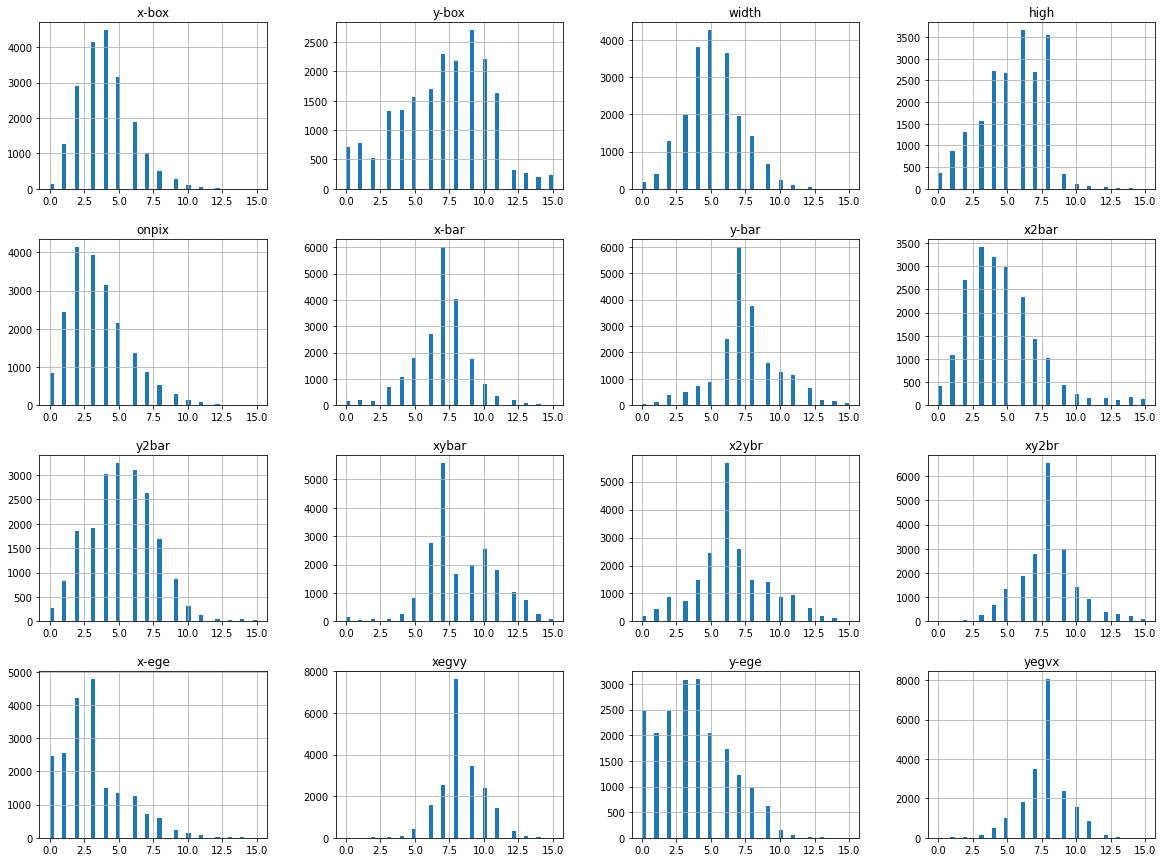

In [54]:
#Display data distribution
dataFrame.hist(bins=50,figsize=(20,15))

A few attributes have a balanced distribution but many do not, this datatset will be normalized using the minmax scalar and re-examined.

In [55]:
#Create pipeline for imputing and scaling 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder

#Build numeric pipeline
num_pipeline = Pipeline(steps=[
                               ('imputer', SimpleImputer(strategy='mean', missing_values=0)),
                               ('scalar', MinMaxScaler())
])

#Transform data
dataFrame_num = dataFrame.drop(columns=['class'])
dataFrame_num_arr = num_pipeline.fit_transform(dataFrame_num)
dataFrame_num_tr = pd.DataFrame(dataFrame_num_arr, columns=dataFrame_num.columns, index=dataFrame_num.index)
xy = pd.concat([dataFrame_num_tr, dataFrame['class']], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f272414db50>,
      dtype=object)

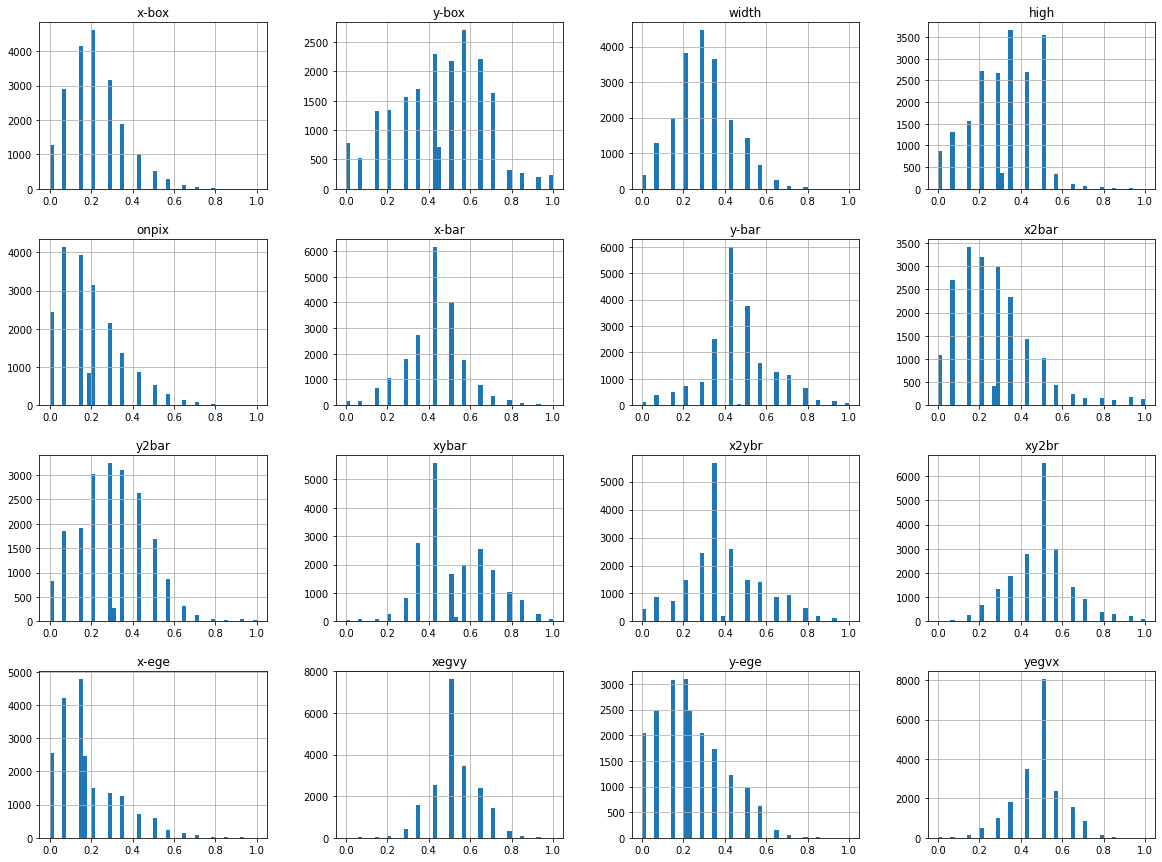

In [56]:
#Examine new data distributions
xy.hist(bins=50, figsize=(20,15))

Now lets examine the distribution of the target attribute (class)

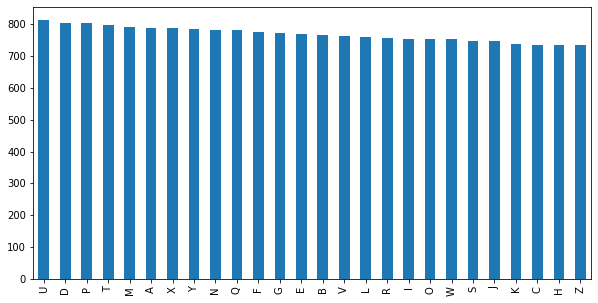

In [57]:
xy['class'].value_counts().plot(kind='bar', figsize=(10,5))

Based on the bar graph above the target class is well distributed

#Models
Create both individual classifiers and a voting classifier and graph the model accuracy scores

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
def cross_validate_model (classifier_model, X, y):
              kfold = KFold(n_splits=3, shuffle=True, random_state=10)

               # perform model cross validation on the shuffled folds
              results = cross_val_score(classifier_model, X, y, cv=kfold)

              # return the mean score for all folds
              return results.mean()


In [9]:
#Import model libs
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

#Break dataset into x and y
y = xy['class']
x = xy.drop(columns=['class'])

#Create models
svcModel = OneVsRestClassifier(SVC(kernel='rbf', C=3, gamma='scale'))
dtModel = DecisionTreeClassifier(criterion='gini')
etModel = ExtraTreesClassifier(n_estimators=250)
sgdModel = OneVsRestClassifier(SGDClassifier(max_iter=1000))
rfModel = RandomForestClassifier(n_estimators=250)
vcModel = VotingClassifier(estimators=[('svc', svcModel), ('dt', dtModel), ('et', etModel), ('sgd', sgdModel), ('rf', rfModel)], voting='hard')

#Run cross validate method on all models
svcScore = cross_validate_model(svcModel, x, y)
dtScore = cross_validate_model(dtModel, x, y)
etScore = cross_validate_model(etModel, x, y)
sgdScore = cross_validate_model(sgdModel, x, y)
rfScore = cross_validate_model(rfModel, x, y)
vcScore = cross_validate_model(vcModel, x, y)

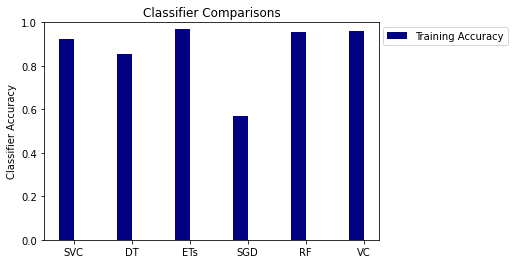

In [10]:
from IPython.core.pylabtools import figsize
#Create bar graph
labels = ['SVC', 'DT', 'ETs', 'SGD', 'RF', 'VC']
modelScores = [svcScore, dtScore, etScore, sgdScore, rfScore, vcScore]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, modelScores, width, label='Training Accuracy', color='navy')

ax.set_ylabel('Classifier Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.4, 1.0), loc='upper right')

plt.title('Classifier Comparisons')
plt.show()

For this dataset with the numeric attributes normalized all of the classifiers tested performed well except the SGD classifier. The voting classifier performed as well as the best individual classifier, which was the Extra Trees classifier. While the models did perform well running all of them led to long run times.

Random Forest was one of the top 3 performing models on the dataset, to find out more about the results of random forest the feature importances will be plotted.

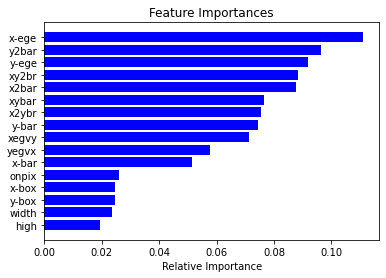

In [11]:
#X variable name was used for plotting, re split x and y
y = xy['class']
x = xy.drop(columns=['class'])

#Fit rf model to check feature importance
rfModel.fit(x,y)

#Plot feature importance
features = list(xy.columns)
importances = rfModel.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#K-Means
Train k-means on the dataset to see if the attributes can be clustered in anyway

In [64]:
#Import KMeans and then run 
from sklearn.cluster import KMeans
inertias = []
K = range(1,20)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(x)
                for k in K]
inertias = [model.inertia_ for model in kmeans_per_k]

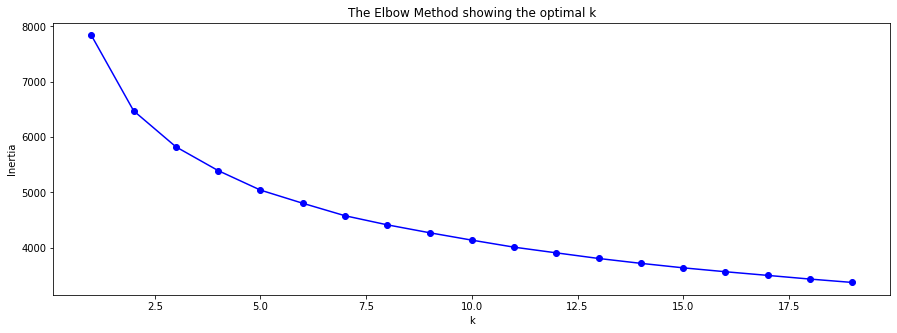

In [65]:
#Plot the inertia values as an elbow plot
plt.figure(figsize=(15,5))
plt.plot(K, inertias, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [68]:
#Now plot the silhouette inertia values
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(x, model.labels_)
                     for model in kmeans_per_k[1:]]

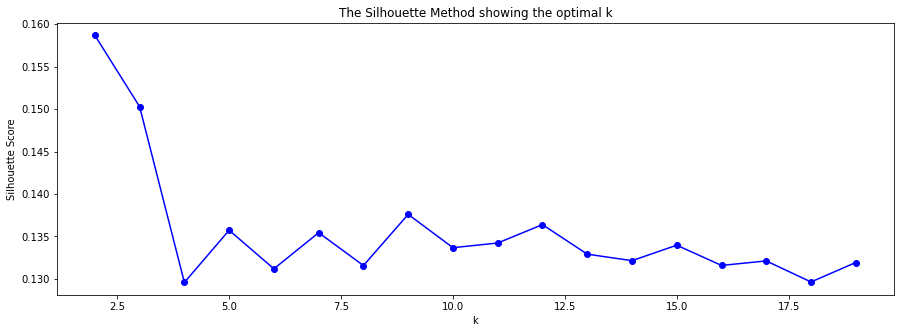

In [70]:
#Plot silhouette line chart
K = range(2,20)
plt.figure(figsize=(15,5))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Method showing the optimal k')
plt.show()

The elbow plot and silhouette plot are showing different results. In the elbow plot as the number of clusters increased the inertia decreased, the decrease looks like it tapers off around 16 clusters. In the silhouette plot it seems to show the opposite, the silhouette score is the best for 2 - 3 clusters, and seems to be worse as the number of clusters increases. Even 2-3 clusters the score is still very close to 0, indicating that perhaps this dataset does not lend itself well to a k-means clustering algorithm.

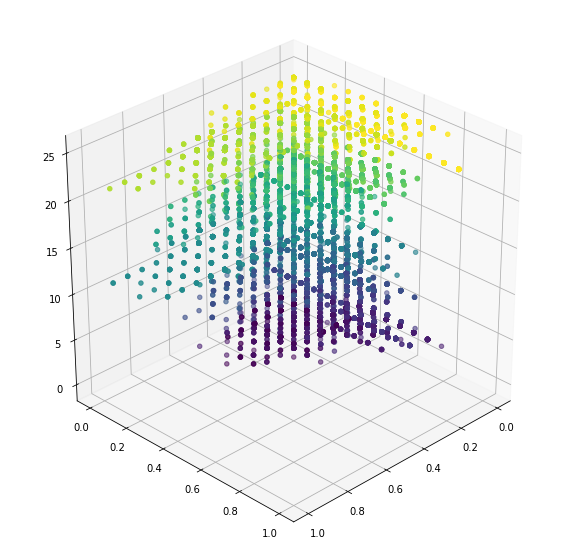

In [63]:
#Create 3D plot of the target concept against the two attributes with the highest feature importance
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Set up data for three-dimensional scattered points; use the 26 labels for color map
encoder =  OrdinalEncoder()
encoder.fit(xy[['class']])
y = encoder.transform(xy[['class']])
ax.scatter3D(x['x-ege'], x['y2bar'], y, c=y)

# rotate the axes and update the view
ax.view_init(30, 45)
plt.draw()

The above scatter plot shows two attributes, x-ege and y2bar (these attributes were selected because they got the highest feature importance score in the RF model) and the target class (labels). The two attributes are color coded based on which label they have. The labels were ordinally encoded before using them to create the plot. Letters A-Z are now numbers 0-25 and those numbers are used to create the colors for each point.

#Report Summary


##Data Cleaning

The dataset examined in this report is used to test Letter Recgonition, the dataset contains 20,000 samples of a list of numeric attributes used to describe the shape and size of a letter and the letter itself.

****

When the dataset was first examined the numeric attributes data were not well distributed and multiple samples contained values of 0. For this dataset a value of 0 was considered to be a missing value as 11 of the attributes in the dataset were means, and a mean cannot be 0 unless each data point in the set is 0. A numeric pipeline was created using the min-max scalar and imputing to replace 0 values with their respective attributes means (mean of all values in the dataset per attribute), this pipeline was then used to clean the data. 

##Model Performance


After the data was cleaned it was seperated into x (all numeric attributes) and y (the letter). X and Y were then used to test 5 different classification models, each model and its accuracy is listed below.

****

**SVC (Support Vector Classification)**

SVC was the first model tested, the hyperparamters used in came from last weeks Grid Search optmization of SVC, these include an rbf kernel, and a learning rate of 3. The model perfomed well when tested using k-folds cross validation producing an accuracy score of 92.3%.

****

**Decision Tree**

A decision tree using hyperparameter gini was also tested using the k-folds cross validation method. The model also perfomed well producing an accuracy score of 85.6%.

****

**Extra-Trees Model**

An extra-trees model with a total estimators of 250 was also tested using the k-folds cross validation method. The model performed exteremly well producing an accuracy score of 96.8%. This was the best performing model tested.

****

**SGD Model**

A SGD classifier with the maximum number of iterations capped at 1000 was also tested using the k-folds cross validation method. The model performed poorly producing an accuracy score of 57%. Of all the models tested this was by far the worst performing for this dataset.

****

**Random Forest**

A Random Forest classifier with a total estimators of 250 was also tested using the k-folds cross validation method. The model performed very well producing an accuracy score of 95.7%. 

****

**Voting Classifier**

After each model was created and tested a voting classifier was created combining the five models together. The voting classifier tested was a hard classifier, and just like the individual models this was tested using k-folds cross validation. The classifier performed extermely well producing an accuracy score of 96.1%. The VC outperformed 4/5 of the individual models only being eclipsed by the Extra-Trees model by .7%. 

****

**Performance Summary**

Overall most of the models performed very well on the letter recgonition dataset with three of te five models tested scoring over a 90% accuracy via k-folds cross validation testing. The best performing models were the Extra-Trees, Random Forest, and SVC classifiers. The Voting classifier also performed very well out-performing 4 of the 5 classifiers tested. The reason the VC might not of out-performed all of the classifiers may be due to how accurate both the VC and Extra-Trees models are (they are so close to 100 that the difference between them may be negligible).

##K-Means Testing

As a test of the K-means clustering algorithm the labels were dropped from the dataset and the remaining numeric attributes were treated as unlabeled data. An elbow plot and a silhouette scores plot were then used to visualize the best number of clusters that can be used to accuractly seperate the data. The elbow plot showed that as the number of clusters increased the inertia decreased, indicating that more clusters were better. The silhouette scores plot showed the opposite. The cluster numbers with the highest silhouette scores were 2 and 3, indicating that the more clusters added the less accuractly the data points were grouped. The silhouette scores for 2 and 3 even though they were the highest on the chart are still below 0.2, indicating that this dataset might not lend itself well to seperation via K-means clustering. 

##My Conclusions

In this report my goal was to train a classification model to successfuly predict a letter based on numeric details about its shape and size. Based on the model accuracy scores listed above I believe I can say that I have accomplished that goal. Another goal of this report was to experiment with the K-means clustering algortihm, and based on the results described above I believe I can say that this algorithm did not perform well on the Letter Recognition dataset.